<a href="https://colab.research.google.com/github/annaamikom/cnn/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN menggunakan TensorFlow
**Studi Kasus : Klasifikasi Anjing Vs Kucing**

Data set: 8000 data training, 2000 data testing

Dataset: https://drive.google.com/drive/folders/1bSdWPKXLf21F0x3qSgq01X2P2HsN394c?usp=sharing


Tahapan membangun CNN :
1. Import Library
2. Instansiasi Object Sequential(modelnya)
3. Menyusun Arsitektur CNN:
    * a. Convulution
    * b. Pooling
    * c. Flattening
    * d. Fully Connection

4. Menjalankan(meng-compile) model
5. Augmentasi (jika Diperlukan)
6. Membangun Model dengan *Training dataset*
7. Evaluasi Model
8. Prediksi

 

In [ ]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [ ]:
#create an object sequential
classifier = Sequential()

# 1. Convolution
Step - 2 : Pooling
Step - 3 : Flattening
Step - 4 : Full connection

In [ ]:
classifier.add(Conv2D(32, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))

# 2 : Pooling 

In [ ]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# 3. Flattening

In [ ]:
classifier.add(Flatten())

# 4. Fully Connecting

In [ ]:
classifier.add(Dense(units = 128, activation = 'relu'))
#initialise our output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))






In [ ]:
#compile the model
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
#augmentation using datagenerator
from keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
drive.mount('/gdrive', force_remount=True)
train_datagen = ImageDataGenerator(rescale = 1./255,
  shear_range = 0.2,
  zoom_range = 0.2,
  horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/gdrive/My Drive/Colab Notebooks/CNN_DOG_VS_CAT/dataset/training_set',
  target_size = (128, 128),
  batch_size = 32,
  class_mode = 'binary')
test_set = test_datagen.flow_from_directory('/gdrive/My Drive/Colab Notebooks/CNN_DOG_VS_CAT/dataset/test_set',
  target_size = (128, 128),
  batch_size = 32,
  class_mode = 'binary')

Mounted at /gdrive
Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
print(training_set.n)
print(training_set.batch_size)

8000
32


In [ ]:
#build the model

STEP_SIZE_TRAIN=training_set.n//training_set.batch_size
STEP_SIZE_VALID=test_set.n//test_set.batch_size
classifier.fit(training_set,
  #steps_per_epoch = 8000,
  steps_per_epoch = STEP_SIZE_TRAIN,
  epochs = 50,
  validation_data = test_set,
  validation_steps = STEP_SIZE_VALID)



Epoch 1/50
250/250 [==============================] - 666s 3s/step - loss: 0.9918 - accuracy: 0.5612 - val_loss: 0.6183 - val_accuracy: 0.6502
Epoch 2/50
250/250 [==============================] - 155s 617ms/step - loss: 0.6198 - accuracy: 0.6574 - val_loss: 0.5906 - val_accuracy: 0.7021
Epoch 3/50
250/250 [==============================] - 154s 616ms/step - loss: 0.5808 - accuracy: 0.6920 - val_loss: 0.6341 - val_accuracy: 0.6336
Epoch 4/50
250/250 [==============================] - 154s 615ms/step - loss: 0.5609 - accuracy: 0.7165 - val_loss: 0.5514 - val_accuracy: 0.7228
Epoch 5/50
250/250 [==============================] - 154s 616ms/step - loss: 0.5431 - accuracy: 0.7254 - val_loss: 0.5553 - val_accuracy: 0.7243
Epoch 6/50
250/250 [==============================] - 154s 615ms/step - loss: 0.5388 - accuracy: 0.7293 - val_loss: 0.5236 - val_accuracy: 0.7480
Epoch 7/50
250/250 [==============================] - 153s 610ms/step - loss: 0.5191 - accuracy: 0.7375 - val_loss: 0.5283 - va

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
 dense (Dense)               (None, 128)               16257152  
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 16,258,177
Trainable params: 16,258,177
Non-trainable params: 0
____________________________________________

In [ ]:
#simpan model
classifier.save('/gdrive/My Drive/Colab Notebooks/CNN_DOG_VS_CAT/model/model_50_epoch.h5')


In [ ]:
# Recreate the exact same model, including its weights and the optimizer
from google.colab import drive
drive.mount('/gdrive', force_remount=True)
from tensorflow.keras.models import load_model
new_model = load_model('/gdrive/My Drive/Colab Notebooks/CNN_DOG_VS_CAT/model/model_50_epoch.h5')

# Show the model architecture
new_model.summary()

Mounted at /gdrive
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
 dense (Dense)               (None, 128)               16257152  
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 16,258,177
Trainable params: 16,258,177
Non-trainable params: 0
_________________________

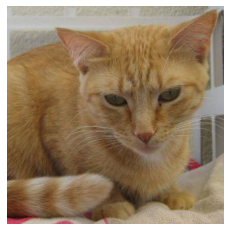

1.0
dog


In [ ]:
# Part 3 - Making new predictions
import numpy as np
from keras.preprocessing import image
from google.colab.patches import cv2,cv2_imshow
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from skimage import io
url='/gdrive/My Drive/Colab Notebooks/CNN_DOG_VS_CAT/dataset/single_prediction/cat_or_dog_6.jpg'
test_image = image.load_img(url, target_size = (128, 128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = new_model.predict(test_image)
image = mpimg.imread(url)
plt.axis("off")
plt.imshow(image)
plt.show()

print (result[0][0])
#training_set.class_indices
if result[0][0] == 1.0:
  print ( 'dog')
else:
  print('cat')

 

https://becominghuman.ai/building-an-image-classifier-using-deep-learning-in-python-totally-from-a-beginners-perspective-be8dbaf22dd8